# Street crime data investigation
# Cambridgeshire June 2017 - April 2018

<h1 id="Licensing-for-the-Home-Office-dataset
 ">Licensing for the Home Office dataset<br />
&nbsp;</h1>

<p>The UK (excluding Scotland) street crime data published by Home Office (n.d.) is licensed under <a href="https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/" target="_blank">Open Government Licence v3.0</a> (The National Archives, 2014).</p>

<h4 id="References:">References:</h4>

<p>Home Office (n.d.) About data.police.uk [Online]. Available at: <a href="https://data.police.uk/about/" target="_blank">https://data.police.uk/about/</a> (Accessed 15 Mar 2019)</p>

<p>The National Archives (2014) <em>Open Government Licence, version 3.0</em> [Online]. Available at: <a href="https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/" target="_blank">https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/</a> (Accessed 15 Mar 2019)</p>


In [31]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 15) # Reset the base size of figures so they're large enough to be useful.
mpl.rcParams.update({'font.size': 24}) # Reset fontsize to a legible one

import scipy.stats

import numpy as np

#import re

#import folium
#import glob
import os

In [32]:
# list contents of 2017-10 folder, count lines

!ls -l ../2018J_TMA02_data/street-crimes/2017-10

total 126356
-rwxrwxrwx 1 oustudent users  3775025 Feb 23 09:54 2017-10-avon-and-somerset-street.csv
-rwxrwxrwx 1 oustudent users  1206717 Feb 23 09:54 2017-10-bedfordshire-street.csv
-rwxrwxrwx 1 oustudent users   779714 Feb 23 09:54 2017-10-btp-street.csv
-rwxrwxrwx 1 oustudent users  1821107 Feb 23 09:54 2017-10-cambridgeshire-street.csv
-rwxrwxrwx 1 oustudent users  2308430 Feb 23 09:54 2017-10-cheshire-street.csv
-rwxrwxrwx 1 oustudent users  1844536 Feb 23 09:54 2017-10-cleveland-street.csv
-rwxrwxrwx 1 oustudent users   771431 Feb 23 09:54 2017-10-cumbria-street.csv
-rwxrwxrwx 1 oustudent users  1780182 Feb 23 09:54 2017-10-derbyshire-street.csv
-rwxrwxrwx 1 oustudent users  2777191 Feb 23 09:54 2017-10-devon-and-cornwall-street.csv
-rwxrwxrwx 1 oustudent users  1289232 Feb 23 09:54 2017-10-dorset-street.csv
-rwxrwxrwx 1 oustudent users  1552959 Feb 23 09:54 2017-10-durham-street.csv
-rwxrwxrwx 1 oustudent users   735395 Feb 23 09:54 2017-10-dyfed-powys-street.csv
-rwxrwxrwx 1 o

In [33]:
# view the first 5 lines of Cambridgeshire street crime data
!head -n 5 '../2018J_TMA02_data/street-crimes/2017-10/2017-10-cambridgeshire-street.csv'

In [34]:
# count the number of lines
!wc -l '../2018J_TMA02_data/street-crimes/2017-10/2017-10-cambridgeshire-street.csv'

7635 ../2018J_TMA02_data/street-crimes/2017-10/2017-10-cambridgeshire-street.csv


# Importing Cambridgeshire dataset
First I will import the data about October 2017. Afterwards I will import the data about the whole year.

In [35]:
# October 2017 - Cambridgeshire
oct_df = pd.read_csv("../2018J_TMA02_data/street-crimes/2017-10/2017-10-cambridgeshire-street.csv")

oct_df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2017-10,Cambridgeshire Constabulary,Cambridgeshire Constabulary,1.251564,52.657696,On or near Sports/Recreation Area,E01026529,Broadland 010D,Anti-social behaviour,NaN,NaN
1,NaN,2017-10,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.135772,52.232788,On or near Kirkwood Road,E01017975,Cambridge 001A,Anti-social behaviour,NaN,NaN
2,NaN,2017-10,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.133320,52.228984,On or near Campkin Road,E01017975,Cambridge 001A,Anti-social behaviour,NaN,NaN
3,NaN,2017-10,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.131997,52.225825,On or near Sports/Recreation Area,E01017975,Cambridge 001A,Anti-social behaviour,NaN,NaN
4,NaN,2017-10,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.130128,52.230525,On or near Crathern Way,E01017975,Cambridge 001A,Anti-social behaviour,NaN,NaN


In [36]:
# what kind of values are there in the Last outcome category?
oct_df['Last outcome category'].unique().tolist()

[nan,
 'Investigation complete; no suspect identified',
 'Unable to prosecute suspect',
 'Offender given a drugs possession warning',
 'Awaiting court outcome',
 'Court result unavailable',
 'Formal action is not in the public interest',
 'Offender given a caution',
 'Status update unavailable',
 'Offender given suspended prison sentence',
 'Suspect charged as part of another case',
 'Offender given community sentence',
 'Local resolution',
 'Offender sent to prison',
 'Offender ordered to pay compensation',
 'Defendant found not guilty',
 'Offender otherwise dealt with',
 'Offender given conditional discharge',
 'Court case unable to proceed',
 'Offender given penalty notice',
 'Offender fined',
 'Defendant sent to Crown Court']

In [37]:
# what kind of values are there in the Crime type? 
print(oct_df['Crime type'].unique().tolist())
# expecting 14 different crime types
print(len(oct_df['Crime type'].unique().tolist()))


['Anti-social behaviour', 'Bicycle theft', 'Burglary', 'Criminal damage and arson', 'Drugs', 'Public order', 'Robbery', 'Shoplifting', 'Vehicle crime', 'Violence and sexual offences', 'Other theft', 'Other crime', 'Theft from the person', 'Possession of weapons']
14


Next I will check if we have data about Cambridgeshire about the whole year:

In [38]:
path = '../2018J_TMA02_data/street-crimes'

file_list=[]

for subdir, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('cambridgeshire-street.csv'):
            print(os.path.join(subdir, file))

../2018J_TMA02_data/street-crimes/2017-06/2017-06-cambridgeshire-street.csv
../2018J_TMA02_data/street-crimes/2017-07/2017-07-cambridgeshire-street.csv
../2018J_TMA02_data/street-crimes/2017-08/2017-08-cambridgeshire-street.csv
../2018J_TMA02_data/street-crimes/2017-09/2017-09-cambridgeshire-street.csv
../2018J_TMA02_data/street-crimes/2017-10/2017-10-cambridgeshire-street.csv
../2018J_TMA02_data/street-crimes/2017-11/2017-11-cambridgeshire-street.csv
../2018J_TMA02_data/street-crimes/2017-12/2017-12-cambridgeshire-street.csv
../2018J_TMA02_data/street-crimes/2018-01/2018-01-cambridgeshire-street.csv
../2018J_TMA02_data/street-crimes/2018-02/2018-02-cambridgeshire-street.csv
../2018J_TMA02_data/street-crimes/2018-03/2018-03-cambridgeshire-street.csv
../2018J_TMA02_data/street-crimes/2018-04/2018-04-cambridgeshire-street.csv


We can see that there is no data from May 2018.

In [39]:
# the whole year (excluding May) - Cambridgeshire
path = '../2018J_TMA02_data/street-crimes'

file_list=[]

for subdir, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('cambridgeshire-street.csv'):
            year_df = pd.read_csv(os.path.join(subdir, file), index_col=None, header = 0)
            file_list.append(year_df)
        
year_df = pd.concat(file_list, axis=0, ignore_index=True)
year_df.head()


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,e553d812d5ef77cf247f60ad0ca64085450f2814ad1aa9...,2017-06,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.400125,52.048434,On or near Sages End Road,E01021375,Braintree 001A,Burglary,Investigation complete; no suspect identified,NaN
1,NaN,2017-06,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.135772,52.232788,On or near Kirkwood Road,E01017975,Cambridge 001A,Anti-social behaviour,NaN,NaN
2,NaN,2017-06,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.131681,52.229005,On or near Crowland Way,E01017975,Cambridge 001A,Anti-social behaviour,NaN,NaN
3,NaN,2017-06,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.130128,52.230525,On or near Crathern Way,E01017975,Cambridge 001A,Anti-social behaviour,NaN,NaN
4,NaN,2017-06,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.136532,52.228485,On or near Jackson Road,E01017975,Cambridge 001A,Anti-social behaviour,NaN,NaN


In [40]:
# check that the tail of the dataframe shows April 
year_df.tail()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
76725,NaN,2018-04,Cambridgeshire Constabulary,Cambridgeshire Constabulary,-0.452352,52.657972,On or near Uffington Road,E01026363,South Kesteven 012D,Anti-social behaviour,NaN,NaN
76726,3c3fab191b853a92879d552083995cf552ee645e6665db...,2018-04,Cambridgeshire Constabulary,Cambridgeshire Constabulary,-0.327727,52.678477,On or near Deene Close,E01026334,South Kesteven 013A,Violence and sexual offences,Under investigation,NaN
76727,29cec1c26a2e70f0ad2b8e3513e7ee68d68def9730bd35...,2018-04,Cambridgeshire Constabulary,Cambridgeshire Constabulary,-0.309860,52.674582,On or near Douglas Road,E01026335,South Kesteven 013B,Public order,Unable to prosecute suspect,NaN
76728,a90fb2c9019673dcd70005c948334078b91629c765ff46...,2018-04,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.330843,52.059861,On or near Over Hall Lane,E01022057,Uttlesford 001A,Burglary,Investigation complete; no suspect identified,NaN
76729,NaN,2018-04,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.190769,52.061398,On or near Whiteways,E01022094,Uttlesford 001D,Anti-social behaviour,NaN,NaN


In [41]:
# count the rows
year_df.count()

Crime ID                 59500
Month                    76730
Reported by              76730
Falls within             76730
Longitude                76730
Latitude                 76730
Location                 76730
LSOA code                76730
LSOA name                76730
Crime type               76730
Last outcome category    59500
Context                      0
dtype: int64

In [42]:
# count the number of each crime type - year (excluding May)
crime_type_freq_ss = year_df['Crime type'].value_counts()
crime_type_freq_ss

Anti-social behaviour           17230
Violence and sexual offences    16623
Other theft                      7351
Criminal damage and arson        7318
Vehicle crime                    6059
Burglary                         5597
Shoplifting                      4937
Bicycle theft                    3813
Public order                     3693
Drugs                            1221
Theft from the person             945
Other crime                       903
Robbery                           584
Possession of weapons             456
Name: Crime type, dtype: int64

In [43]:
# count the number of each crime type - October
oct_df['Crime type'].value_counts()

Anti-social behaviour           1708
Violence and sexual offences    1571
Criminal damage and arson        730
Vehicle crime                    671
Other theft                      662
Burglary                         628
Bicycle theft                    468
Shoplifting                      442
Public order                     358
Drugs                            121
Other crime                       83
Theft from the person             79
Robbery                           68
Possession of weapons             45
Name: Crime type, dtype: int64

In [44]:
# how many crimes of each type by month
year_df.groupby(['Month', 'Crime type']).size()
crime_types_df = year_df.groupby(['Month', 'Crime type']).size().to_frame('Total crime per month').reset_index().sort_values(['Month', 'Total crime per month'], ascending=[True, False])
crime_types_df.head()

,Month,Crime type,Total crime per month
0,2017-06,Anti-social behaviour,2208
13,2017-06,Violence and sexual offences,1675
6,2017-06,Other theft,729
3,2017-06,Criminal damage and arson,713
12,2017-06,Vehicle crime,590


In [45]:
# show total crime amount for each month
monthly_df = crime_types_df.pivot_table(index=['Month'], aggfunc=np.sum).reset_index()
# convert month to datetime so that the months show on the plot appropriately
monthly_df['Month'] = pd.to_datetime(monthly_df['Month'])
monthly_df

,Month,Total crime per month
0,2017-06-01,8098
1,2017-07-01,8053
2,2017-08-01,7161
3,2017-09-01,7126
4,2017-10-01,7634
5,2017-11-01,7252
6,2017-12-01,6400
7,2018-01-01,6535
8,2018-02-01,5859
9,2018-03-01,6330


# Visualising the street crime changes during the year

(0, 9000)

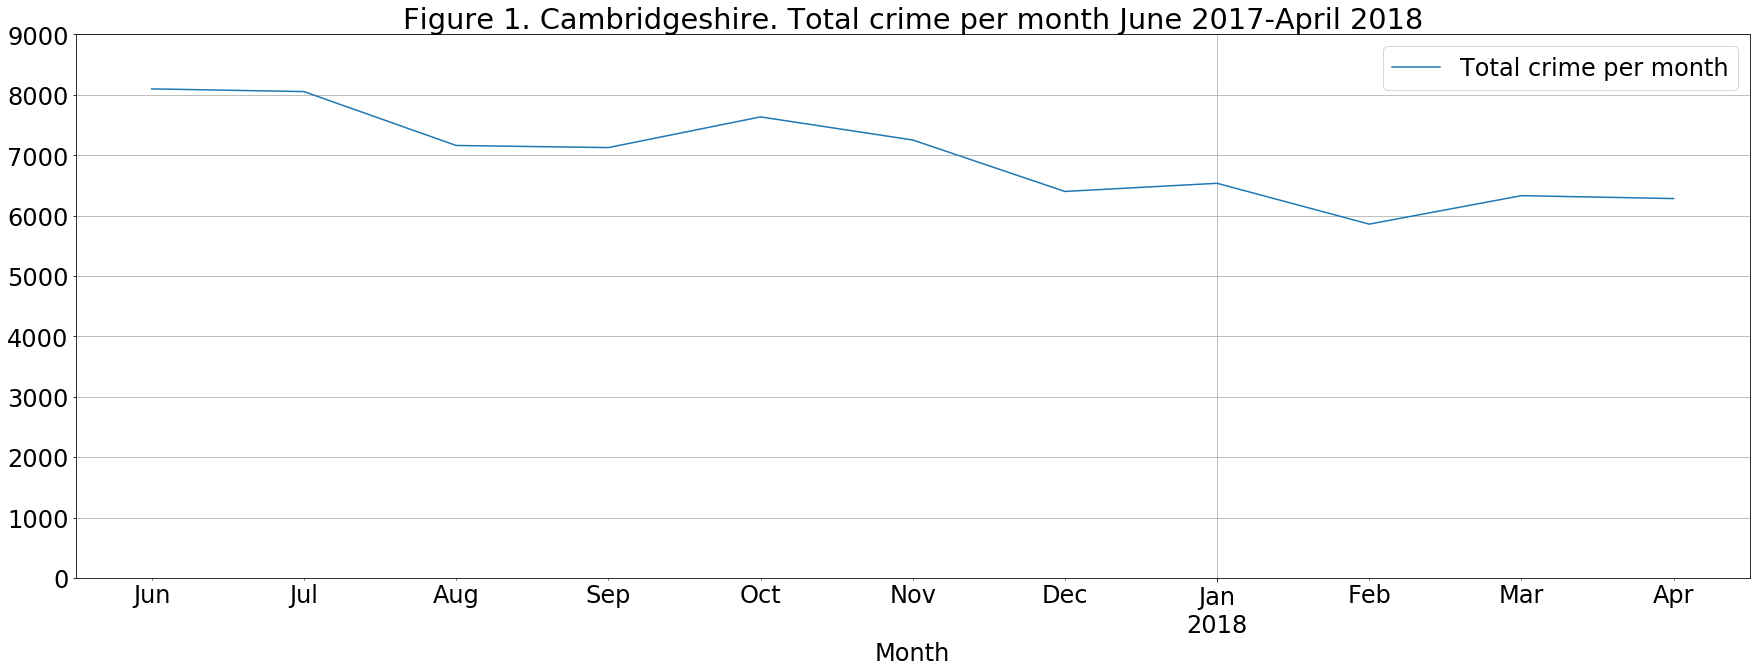

In [46]:
# plot total crime per month
ax = monthly_df[['Month', 'Total crime per month']].plot.line(x='Month', y='Total crime per month',
                                                         figsize=(30,10), grid=True,
                                                       title="Figure 1. Cambridgeshire. Total crime per month June 2017-April 2018");

ax.set_ylim(0, 9000) 

<p><strong>Figure 1</strong> plot shows that there is a decrease in total crimes in Cambridgeshire over the 11 month period.</p>

<p>However, there is no data about May (the last month) in this dataset, therefore the plot doesn&#39;t show whether the plot line continues to go down, up or stays steady.</p>

<p>Furthermore, this plot only shows the recorded street crime data over one year. More year data should be analysed to see if the pattern of decreasing crime (June to April) persists. Also, the population change should be taken into account (which we do not have in this dataset).</p>


#### Chi-squared ($\chi^2$) test
I will use the chi-squared test to find out how significant are the differences in total recorded crimes by month.

In [47]:
monthly_df.set_index('Month', inplace=True)
monthly_df.index.name = None

In [48]:
monthly_df

,Total crime per month
2017-06-01,8098
2017-07-01,8053
2017-08-01,7161
2017-09-01,7126
2017-10-01,7634
2017-11-01,7252
2017-12-01,6400
2018-01-01,6535
2018-02-01,5859
2018-03-01,6330


In [49]:
crime_by_month_ss = monthly_df['Total crime per month']
crime_by_month_ss

2017-06-01    8098
2017-07-01    8053
2017-08-01    7161
2017-09-01    7126
2017-10-01    7634
2017-11-01    7252
2017-12-01    6400
2018-01-01    6535
2018-02-01    5859
2018-03-01    6330
2018-04-01    6282
Name: Total crime per month, dtype: int64

In [50]:
expected_crime_by_month_ss = pd.Series(crime_by_month_ss.sum() / len(crime_by_month_ss), 
                                  index=crime_by_month_ss.index)
expected_crime_by_month_ss

2017-06-01    6975.4545455
2017-07-01    6975.4545455
2017-08-01    6975.4545455
2017-09-01    6975.4545455
2017-10-01    6975.4545455
2017-11-01    6975.4545455
2017-12-01    6975.4545455
2018-01-01    6975.4545455
2018-02-01    6975.4545455
2018-03-01    6975.4545455
2018-04-01    6975.4545455
dtype: float64

In [51]:
scipy.stats.chisquare(crime_by_month_ss, expected_crime_by_month_ss)

Power_divergenceResult(statistic=811.0686823928061, pvalue=8.607299666000537e-168)

The *p* value is 0 so we can reject the null hypothesis that the month of the year doesn't affect number of crime recorded. 
The *p* value indicates that the total recorded number of crimes being different in each month is significant.

In [52]:
monthly_crimes_df = crime_types_df.pivot('Month','Crime type', 'Total crime per month')
monthly_crimes_df.index = pd.to_datetime(monthly_crimes_df.index)
monthly_crimes_df


Crime type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
Month,,,,,,,,,,,,,,
2017-06-01,2208,495,473,713,100,73,729,51,405,55,449,82,590,1675
2017-07-01,2182,428,520,740,136,94,726,42,403,54,452,95,567,1614
2017-08-01,1736,432,529,646,113,72,714,51,332,40,441,86,462,1507
2017-09-01,1611,335,546,691,101,74,694,31,342,47,477,77,629,1471
2017-10-01,1708,468,628,730,121,83,662,45,358,68,442,79,671,1571
2017-11-01,1365,385,616,757,119,90,772,33,312,61,514,90,610,1528
2017-12-01,1232,257,546,659,108,62,657,30,276,58,381,111,568,1455
2018-01-01,1207,267,589,610,118,109,617,42,313,49,442,84,598,1490
2018-02-01,1245,212,411,546,110,76,606,41,306,40,453,63,483,1267


I will use this dataframe to determine whether the proportions of different crimes recorded are impacted by or are independent of the month of the year.

In [53]:
chi2, p, _, _ = scipy.stats.chi2_contingency(monthly_crimes_df)
chi2, p

(930.0914709269982, 5.171767214090179e-121)

The *p* value is is again 0, which suggests that crime type distribution is affected by month.

#### Next I will plot a simple graph to see which types of crime are the most and least prevalent.

In [54]:
#monthly_crimes_df = crime_types_df.pivot('Month','Crime type', 'Total crime per month').reset_index()

#monthly_crimes_df.rename_axis(None, 1, inplace=True)
#monthly_crimes_df

# shows dataframe columns month  to violence anc sexual offences

In [55]:
#monthly_crimes_df = crime_types_df.pivot('Month','Crime type', 'Total crime per month')

#monthly_crimes_df.rename_axis(None, 1, inplace=True)
#monthly_crimes_df

# shows dataframe where Month is index

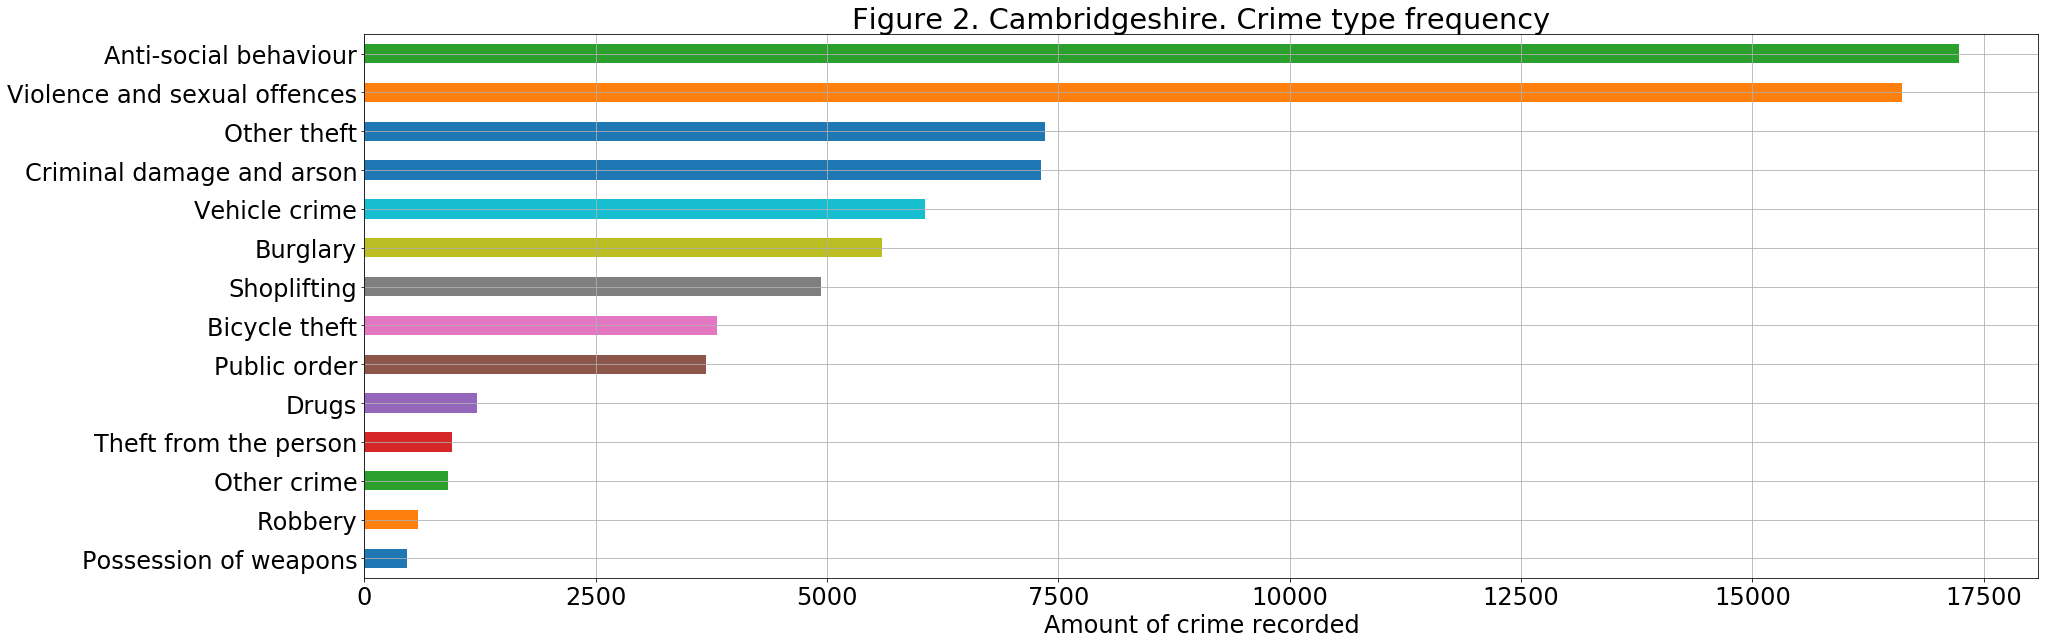

In [56]:
ax = crime_type_freq_ss.sort_values().plot.barh(x='Amount', y='Crime type', 
                                                           figsize=(30,10), grid=True,
                                                           title="Figure 2. Cambridgeshire. Crime type frequency")
ax.set_xlabel('Amount of crime recorded');

<p>In <strong>Figure 2</strong> we can see that the number of the two most common crime types - Anti-social behaviour and Violence and sexual offences - exceed any other crime more than two times.</p>


I want to see if the amount of each crime is changing over the 11 month period, or staying somewhat constant. Therefore I will plot three plots showing the two most frequent crimes, the five least frequent crimes and those in the middle.

In [57]:
# column names in descending order
column_list = list(crime_type_freq_ss.index.tolist())
column_list

['Anti-social behaviour',
 'Violence and sexual offences',
 'Other theft',
 'Criminal damage and arson',
 'Vehicle crime',
 'Burglary',
 'Shoplifting',
 'Bicycle theft',
 'Public order',
 'Drugs',
 'Theft from the person',
 'Other crime',
 'Robbery',
 'Possession of weapons']

Text(0,0.5,'Amount')

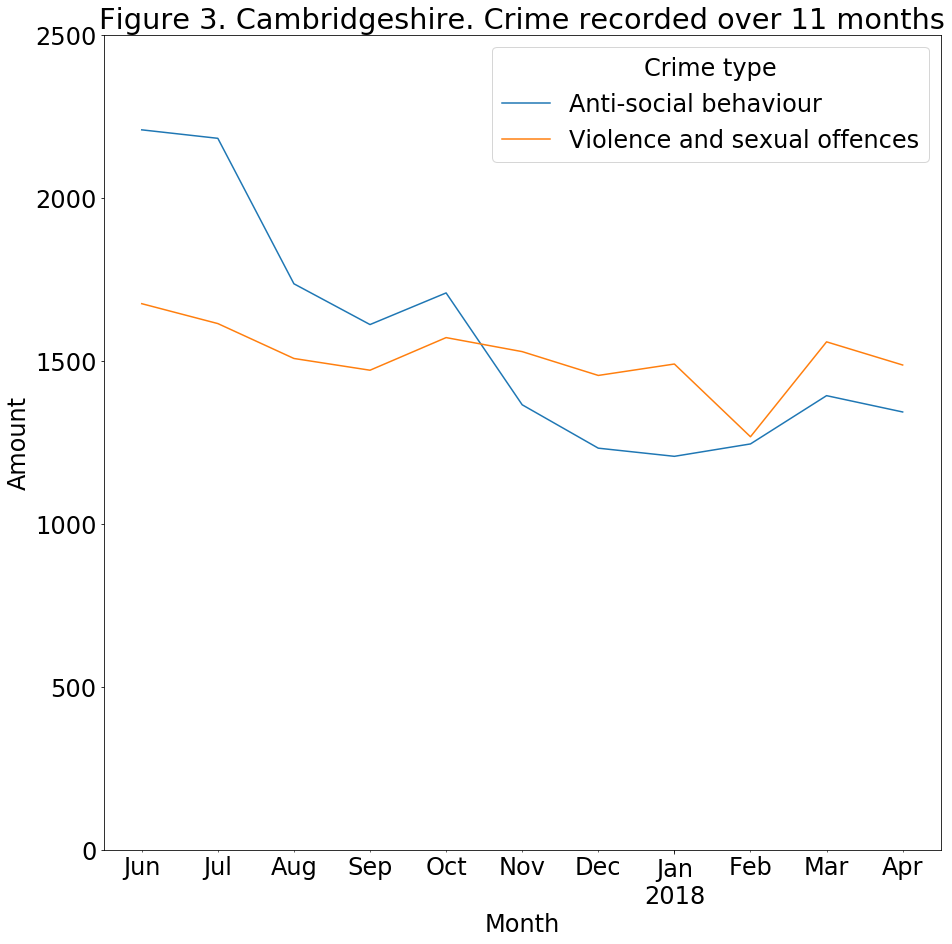

In [58]:
# two most common crimes over the 11 months
ax = monthly_crimes_df[column_list[0:2]].plot.line(title="Figure 3. Cambridgeshire. Crime recorded over 11 months");

ax.set_ylim(0, 2500)
ax.set_ylabel('Amount')

<p><strong>Figure 3</strong> shows that Anti-social behaviour reaches its lowest point during the winter and peaks during the summer.</p>


Text(0,0.5,'Amount')

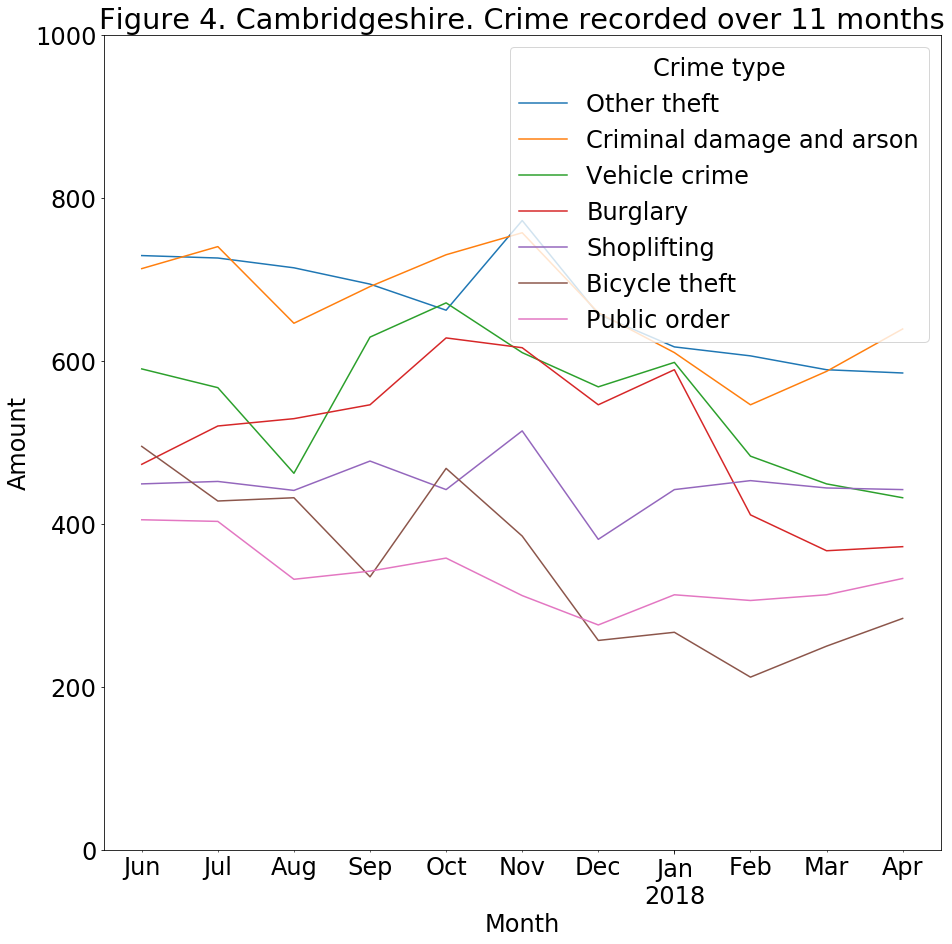

In [59]:
# 7 crimes in the middle over 11 months
ax = monthly_crimes_df[column_list[2:9]].plot.line(title="Figure 4. Cambridgeshire. Crime recorded over 11 months");

ax.set_ylim(0, 1000)
ax.set_ylabel('Amount')


<p><strong>Figure 4</strong> shows that there is a general tendency of less crimes being recorded during the colder months. There are some crimes such as shoplifting that tend to stay consistent.</p>


Text(0,0.5,'Amount')

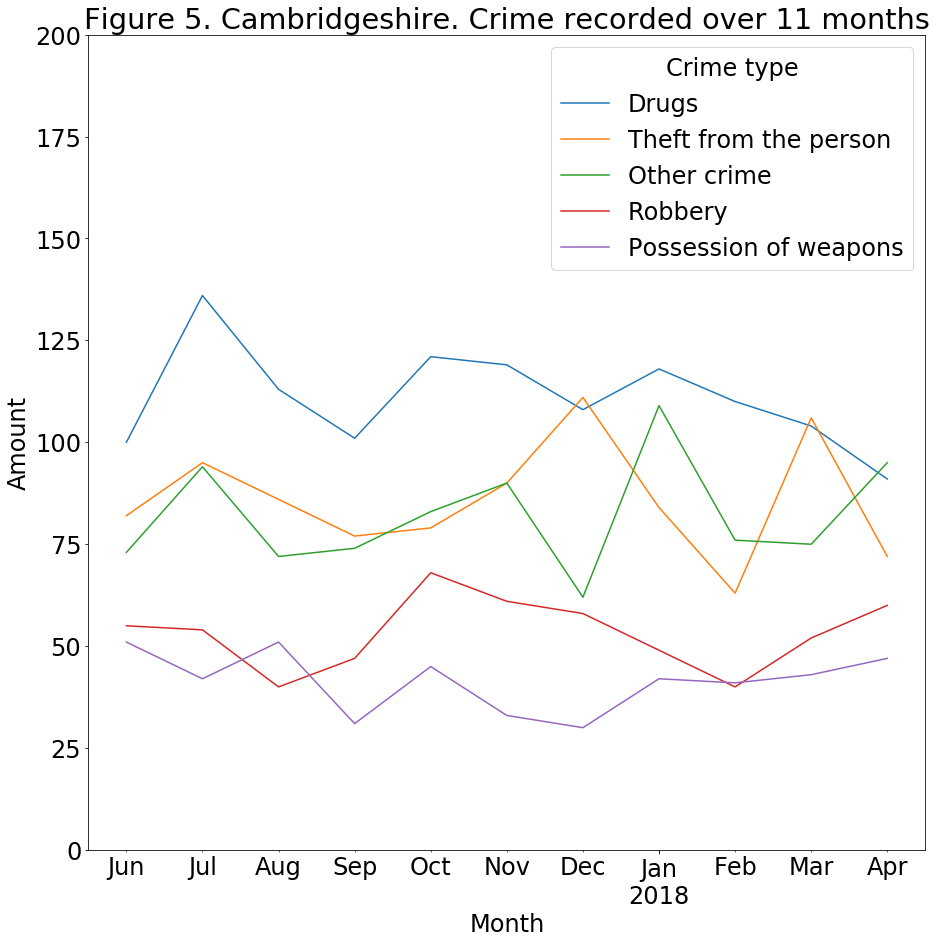

In [60]:
# 5 crimes that are the least frequent (over 11 months)
ax = monthly_crimes_df[column_list[9:]].plot.line(title="Figure 5. Cambridgeshire. Crime recorded over 11 months");

ax.set_ylim(0, 200)
ax.set_ylabel('Amount')

<p><strong>Figure 5</strong>. The least frequent crimes don&#39;t show a decrease during the winter months. These crimes tend to oscillate or have peaks during the summer and winter months.</p>
